# Sequential Approximation

In [0]:
import matplotlib
from matplotlib import interactive
interactive(True)

import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys

In [4]:
# import core methods - Allow to run standalone in Google Collab
!git clone https://github.com/PML-UCF/SequentialResponseSurface.git
from SequentialResponseSurface.core import ResponseSurface, GenerateGrid, DiagSampling, NewDOE

Cloning into 'SequentialResponseSurface'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14 (delta 2), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [5]:
# Mount Google Drive folder and create PML folder
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
data = pd.read_excel('drive/My Drive/PML/doe.xlsx')

In [0]:
# TODO - Data is loaded with cols x1,x2,y. Code need to be fixed to use those generic names
# For now workaround to test, renaming cols to old names
data.columns = ['Rr', 'Rw', 'Ft']

In [0]:
inputs = data[['Rr','Rw']]
output = data['Ft']

In [9]:
MyResponseSurface = ResponseSurface(inputs, output, intercept=True, interaction=True)

var1_limits = [2,6]
var2_limits = [0.75,3]

Grid = GenerateGrid(MyResponseSurface, var1_limits, var2_limits)

/content/SequentialResponseSurface/core.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.coef = np.linalg.lstsq(self.coef_matrix, output)[0]


In [0]:
# Sequential Approximation

In [11]:
points = 15
new = DiagSampling(Grid,inputs,output,var1_limits,var2_limits,points)

/content/SequentialResponseSurface/core.py:49: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef = np.linalg.lstsq(coef_matrix, output)[0]


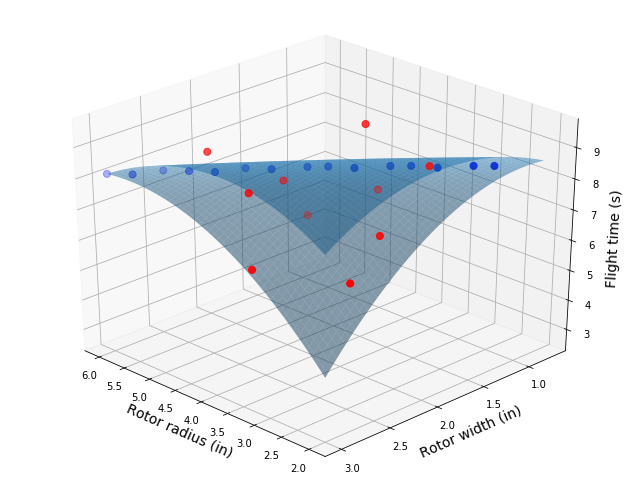

In [17]:
fig = plt.figure(figsize=(8.6, 6.6))
ax = Axes3D(fig)
ax.set_xlabel('Rotor radius (in)',fontsize = 14)
ax.set_ylabel('Rotor width (in)',fontsize = 14)
ax.set_zlabel('Flight time (s)',fontsize = 14)
ax.view_init(elev=None, azim=135)

ax.scatter(xs = inputs['Rr'], ys = inputs['Rw'], zs = output, s=50, c='r')
ax.scatter(xs = new['Rr'], ys = new['Rw'], zs = new['Ft'], s=50, c='b')
ax.view_init(elev=None, azim=135)

ax.plot_surface(Grid['input1'], Grid['input2'], Grid['output'], shade = True, alpha = 0.5)
plt.show()

In [0]:
new_doe = NewDOE(data,new)
new_doe.to_excel('drive/My Drive/PML/new_doe.xlsx')